In this document I am loading and studying the dataset. Then I will be transforming the text into numerical values. Finally I will train the model. 

# Import Libraries


In [14]:
import pandas as pd

#Libraries to train the model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


#Libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Data


In [15]:
dataset = pd.read_csv("text.csv")

In [16]:
dataset.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [18]:
print(dataset.isna().sum())

Unnamed: 0    0
text          0
label         0
dtype: int64


As we can see there are no null values for any of the features. Each text ,essage has associated to it a number that shows which feeling is that message.

sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)

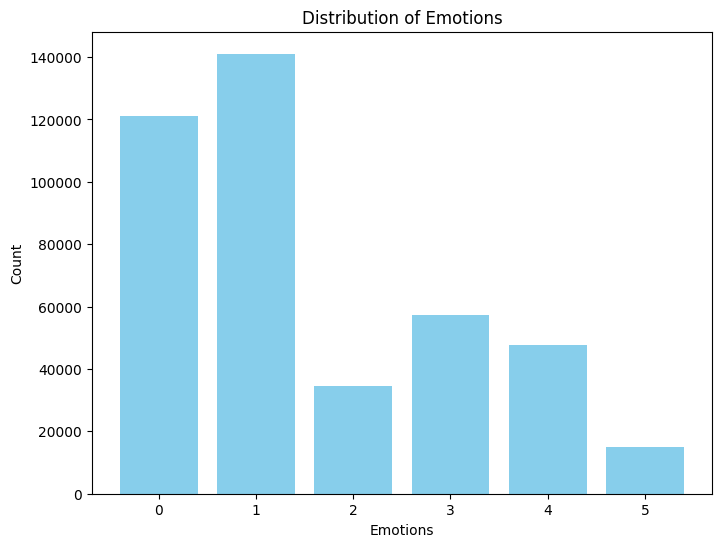

In [19]:
emotion_counts = {}
for emotion in dataset["label"]:
    emotion_counts[emotion] = emotion_counts.get(emotion, 0) + 1

# Extract emotion labels and counts
labels = list(emotion_counts.keys())
counts = list(emotion_counts.values())

# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Distribution of Emotions')
plt.show()

Our model will be clearly better at detecting sadness and joy.

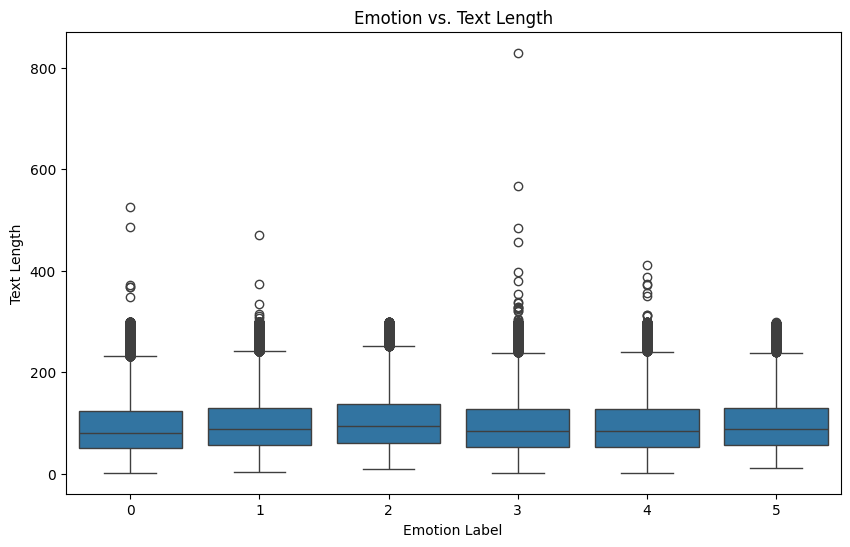

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y=dataset["text"].apply(len), data=dataset)
plt.title('Emotion vs. Text Length')
plt.xlabel('Emotion Label')
plt.ylabel('Text Length')
plt.show()

# Split Data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], dataset['label'], test_size=0.3, random_state=0)

# Text vectorization


In [27]:
#We set the gvectorizer that we are going to use
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
#
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

# Model Training

In [28]:
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [29]:
accuracy = classifier.score(X_test_vec, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8492518573610678


In [30]:
# Make predictions on the test data
y_pred = classifier.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8492518573610678
Confusion Matrix:
[[34312  1494    36   212   146     4]
 [ 1010 40963   201    98    98     4]
 [  618  4473  5225    67    28     0]
 [ 1833  1315    31 13793   300     5]
 [ 1701  1448    16   537 10505    34]
 [  608  1737    14    35   747  1395]]


# Saving the trained model to use it with new text

In [31]:
# Save the trained model to a file
joblib.dump(classifier, 'trained_model.pkl')

['trained_model.pkl']